In [1]:
from matplotlib import pyplot as plt

from cost_functions import *
from helpers import Vehicle
from ptg import PTG


In [2]:
def show_trajectory(traj, vehicle=None):
    s_coeffs, d_coeffs, t = traj
    s = to_equation(s_coeffs)
    d = to_equation(d_coeffs)
    X = []
    Y = []
    if vehicle:
        X2 = []
        Y2 = []
    t = 0
    while t <= T:
        X.append(s(t))
        Y.append(d(t))
        if vehicle:
            s_, _, _, d_, _, _ = vehicle.state_in(t)
            X2.append(s_)
            Y2.append(d_)
        t += 0.25
    plt.scatter(X, Y, color="blue")
    if vehicle:
        plt.scatter(X2, Y2, color="red")
    plt.show()


In [3]:
straight_in_left = Vehicle([
    0, 10, 0,
    0, 0, 0
])

traffic = {
    0: straight_in_left,
}

start_s = [0, 5, 0]
start_d = [4, 0, 0]
target_vehicle = 0
delta = [6, 0, 0, 0, 0, 0]
T = 6


cost for time_diff_cost is 	 0.0
cost for s_diff_cost is 	 7.105427357601002e-14
cost for d_diff_cost is 	 2.6645352591003757e-14
cost for efficiency_cost is 	 -0.18131895555408017
cost for max_jerk_cost is 	 0
cost for total_jerk_cost is 	 0.5148805301538255
cost for collision_cost is 	 2.0
cost for buffer_cost is 	 6.197509805679964
cost for max_accel_cost is 	 0
cost for total_accel_cost is 	 0.8137095690559748


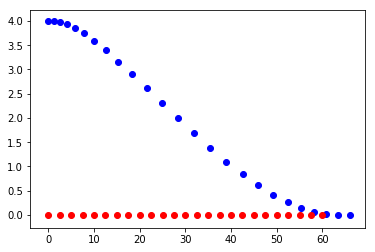

In [4]:
# TODO - tweak weights to existing cost functions
WEIGHTED_COST_FUNCTIONS = [
    (time_diff_cost, 1),
    (s_diff_cost, 10),
    (d_diff_cost, 10),
    (efficiency_cost, 2),
    (max_jerk_cost, 2),
    (total_jerk_cost, 1),
    (collision_cost, 2),
    (buffer_cost, 8),
    (max_accel_cost, 1),
    (total_accel_cost, 1),
]

traj = PTG(start_s, start_d, target_vehicle, delta, T, traffic, WEIGHTED_COST_FUNCTIONS)
show_trajectory(traj, straight_in_left)


In [5]:
straight_in_left.state_in(6)


[60.0, 10, 0, 0.0, 0, 0]

In [6]:
to_equation(traj[0])(6)


66.0